# Search GliderDAC for Pioneer Glider Data

Use ERDDAP's RESTful advanced search to try to find OOI Pioneer glider water temperatures from the IOOS GliderDAC.  Use case from Stace Beaulieu (sbeaulieu@whoi.edu)

In [1]:
import pandas as pd

### First try just searching for "glider"

In [2]:
url = 'https://data.ioos.us/gliders/erddap/search/advanced.csv?page=1&itemsPerPage=1000&searchFor={}'.format('glider')
dft = pd.read_csv(url, usecols=['Title', 'Summary', 'Institution','Dataset ID'])  
dft.head()

,Title,Summary,Institution,Dataset ID
0,All aoml Gliders,Seaglider data gathered as part of the Sustain...,National Oceanic and Atmospheric Administratio...,allaomlGliders
1,All corie Gliders,Slocum glider dataset gathered as part of the ...,Oregon Health & Science University,allcorieGliders
2,All mbari Gliders,"Seaglider SG130 Trinidad Head IOOS line, Calif...","Oregon State University¦College of Earth, Ocea...",allmbariGliders
3,All rmiller Gliders,Deployment in support of the calibration of Gr...,GLOS/CILER,allrmillerGliders
4,All rutgers Gliders,KOPRI is an international collaboration betwee...,KOPRI,allrutgersGliders


### Now search for all temperature data in specified bounding box and temporal extent

In [3]:
start = '2000-01-01T00:00:00Z'
stop  = '2017-02-22T00:00:00Z'
lat_min =  39.
lat_max =  41.5
lon_min = -72.
lon_max = -69.
standard_name = 'sea_water_temperature'
endpoint = 'https://data.ioos.us/gliders/erddap/search/advanced.csv'

In [4]:
import pandas as pd

base = (
    '{}'
    '?page=1'
    '&itemsPerPage=1000'
    '&searchFor='
    '&protocol=(ANY)'
    '&cdm_data_type=(ANY)'
    '&institution=(ANY)'
    '&ioos_category=(ANY)'
    '&keywords=(ANY)'
    '&long_name=(ANY)'
    '&standard_name={}'
    '&variableName=(ANY)'
    '&maxLat={}'
    '&minLon={}'
    '&maxLon={}'
    '&minLat={}'
    '&minTime={}'
    '&maxTime={}').format

url = base(
    endpoint,
    standard_name,
    lat_max,
    lon_min,
    lon_max,
    lat_min,
    start,
    stop
)

print(url)

https://data.ioos.us/gliders/erddap/search/advanced.csv?page=1&itemsPerPage=1000&searchFor=&protocol=(ANY)&cdm_data_type=(ANY)&institution=(ANY)&ioos_category=(ANY)&keywords=(ANY)&long_name=(ANY)&standard_name=sea_water_temperature&variableName=(ANY)&maxLat=41.5&minLon=-72.0&maxLon=-69.0&minLat=39.0&minTime=2000-01-01T00:00:00Z&maxTime=2017-02-22T00:00:00Z


In [5]:
dft = pd.read_csv(url, usecols=['Title', 'Summary', 'Institution', 'Dataset ID'])  
print('Glider Datasets Found = {}'.format(len(dft)))
dft

Glider Datasets Found = 10


,Title,Summary,Institution,Dataset ID
0,All drudnick Gliders,Spray glider profile data from Scripps Institu...,Scripps Institution of Oceanography,alldrudnickGliders
1,All rutgers Gliders,KOPRI is an international collaboration betwee...,KOPRI,allrutgersGliders
2,blue-20150627T1242,U.S. IOOS Mid-Atlantic Regional Consortium of ...,University of Massachusetts Darmouth,blue-20150627T1242
3,blue-20160518T1525,U.S. IOOS Mid-Atlantic Regional Association Co...,University of Massachusetts Darmouth,blue-20160518T1525
4,blue-20160818T1448,U.S. IOOS Mid-Atlantic Regional Association Co...,University of Massachusetts Darmouth,blue-20160818T1448
5,silbo-20160413T1534,The Silbo Challenger mission is a partnership ...,Teledyne Webb Research Corporation,silbo-20160413T1534
6,sp010-20150409T1524,Spray glider profile data from Woods Hole Ocea...,Woods Hole Oceanographic Institution,sp010-20150409T1524
7,sp065-20151001T1507,Spray glider profile data from Woods Hole Ocea...,Woods Hole Oceanographic Institution,sp065-20151001T1507
8,sp066-20151217T1624,Spray glider profile data from Woods Hole Ocea...,Woods Hole Oceanographic Institution,sp066-20151217T1624
9,whoi_406-20160902T1700,Slocum glider dataset gathered as part of the ...,Woods Hole Oceanographic Institution,whoi_406-20160902T1700


Define a function that returns a Pandas DataFrame based on the dataset ID.  The ERDDAP request variables (e.g. pressure, temperature) are hard-coded here, so this routine should be modified for other ERDDAP endpoints or datasets

In [6]:
def download_df(glider_id):
    from pandas import DataFrame, read_csv
#    from urllib.error import HTTPError
    uri = ('https://data.ioos.us/gliders/erddap/tabledap/{}.csv'
           '?trajectory,wmo_id,time,latitude,longitude,depth,pressure,temperature'
           '&time>={}'
           '&time<={}'
           '&latitude>={}'
           '&latitude<={}'
           '&longitude>={}'
           '&longitude<={}').format
    url = uri(glider_id,start,stop,lat_min,lat_max,lon_min,lon_max)
    print(url)
    # Not sure if returning an empty df is the best idea.
    try:
        df = read_csv(url, index_col='time', parse_dates=True, skiprows=[1])
    except:
        df = pd.DataFrame()
    return df

In [7]:
# concatenate the dataframes for each dataset into one single dataframe   
df = pd.concat(list(map(download_df, dft['Dataset ID'].values)))

https://data.ioos.us/gliders/erddap/tabledap/alldrudnickGliders.csv?trajectory,wmo_id,time,latitude,longitude,depth,pressure,temperature&time>=2000-01-01T00:00:00Z&time<=2017-02-22T00:00:00Z&latitude>=39.0&latitude<=41.5&longitude>=-72.0&longitude<=-69.0
https://data.ioos.us/gliders/erddap/tabledap/allrutgersGliders.csv?trajectory,wmo_id,time,latitude,longitude,depth,pressure,temperature&time>=2000-01-01T00:00:00Z&time<=2017-02-22T00:00:00Z&latitude>=39.0&latitude<=41.5&longitude>=-72.0&longitude<=-69.0
https://data.ioos.us/gliders/erddap/tabledap/blue-20150627T1242.csv?trajectory,wmo_id,time,latitude,longitude,depth,pressure,temperature&time>=2000-01-01T00:00:00Z&time<=2017-02-22T00:00:00Z&latitude>=39.0&latitude<=41.5&longitude>=-72.0&longitude<=-69.0
https://data.ioos.us/gliders/erddap/tabledap/blue-20160518T1525.csv?trajectory,wmo_id,time,latitude,longitude,depth,pressure,temperature&time>=2000-01-01T00:00:00Z&time<=2017-02-22T00:00:00Z&latitude>=39.0&latitude<=41.5&longitude>=-72.

In [8]:
print('Total Data Values Found: {}'.format(len(df)))

Total Data Values Found: 579822


In [9]:
df.head()

,trajectory,wmo_id,latitude,longitude,depth,pressure,temperature
time,,,,,,,
2015-06-20 04:12:15,sp010-20150409T1524,4801909,39.44435,-71.99732,0.00000,0.00,NaN
2015-06-20 04:12:15,sp010-20150409T1524,4801909,39.44435,-71.99732,306.18097,308.76,9.555
2015-06-20 04:12:15,sp010-20150409T1524,4801909,39.44435,-71.99732,305.15042,307.72,9.589
2015-06-20 04:12:15,sp010-20150409T1524,4801909,39.44435,-71.99732,303.80276,306.36,9.663
2015-06-20 04:12:15,sp010-20150409T1524,4801909,39.44435,-71.99732,302.21730,304.76,9.769


In [10]:
df.tail()

,trajectory,wmo_id,latitude,longitude,depth,pressure,temperature
time,,,,,,,
2016-09-20 13:32:33,whoi_406-20160902T1700,4801945,41.048109,-70.928635,5.19,5.19,18.9365
2016-09-20 13:32:33,whoi_406-20160902T1700,4801945,41.048109,-70.928635,4.82,4.82,18.9450
2016-09-20 13:32:33,whoi_406-20160902T1700,4801945,41.048109,-70.928635,4.44,4.44,18.9572
2016-09-20 13:32:33,whoi_406-20160902T1700,4801945,41.048109,-70.928635,4.06,4.06,18.9713
2016-09-20 13:32:33,whoi_406-20160902T1700,4801945,41.048109,-70.928635,3.52,3.52,18.9974


# plot up the trajectories with Cartopy (Basemap replacement)

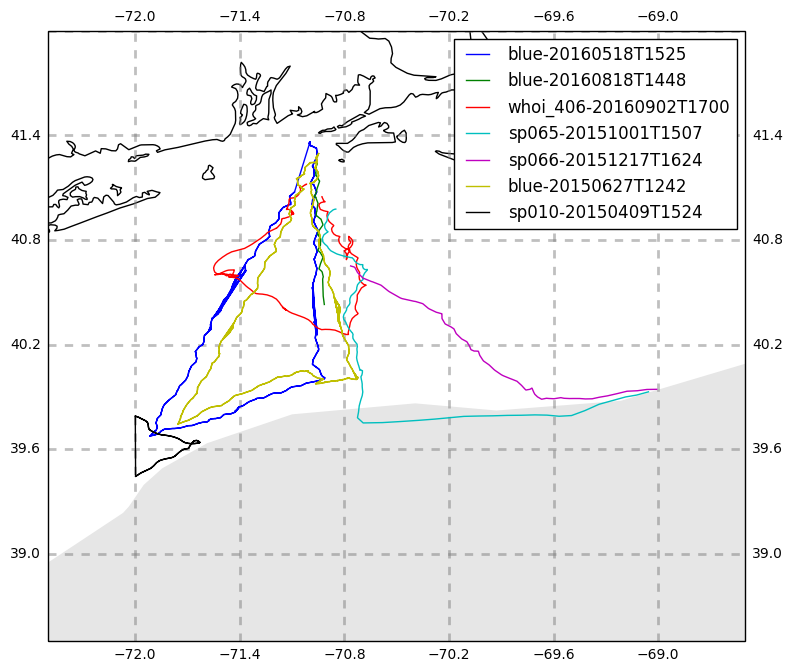

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
bathym_1000 = NaturalEarthFeature(name='bathymetry_J_1000',
                                  scale='10m', category='physical')
fig, ax = plt.subplots(
    figsize=(9, 9),
    subplot_kw=dict(projection=ccrs.PlateCarree())
)
ax.coastlines(resolution='10m')
ax.add_feature(bathym_1000, facecolor=[0.9, 0.9, 0.9], edgecolor='none')
dx = dy = 0.5
ax.set_extent([lon_min-dx, lon_max+dx, lat_min-dy, lat_max+dy])

g = df.groupby('trajectory')
for glider in g.groups:
    traj = df[df['trajectory'] == glider]
    ax.plot(traj['longitude'], traj['latitude'], label=glider)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
ax.legend();